# Import libs and data

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd
from tinydb import TinyDB, Query
from config import *

In [2]:
db = TinyDB(DB_FILE)
processed_table = db.table(TABLE_PROCESSED)

In [3]:
data = processed_table.all() 
df = pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              656 non-null    object 
 1   min_salary         68 non-null     float64
 2   max_salary         59 non-null     float64
 3   salary_currency    86 non-null     object 
 4   minimum_education  658 non-null    object 
 5   languages          658 non-null    object 
 6   experience         432 non-null    float64
 7   responsibilities   658 non-null    object 
 8   hard_skills        658 non-null    object 
 9   soft_skills        658 non-null    object 
 10  certifications     658 non-null    object 
 11  benefits           658 non-null    object 
 12  city               346 non-null    object 
 13  country            376 non-null    object 
 14  company_name       656 non-null    object 
 15  company_size       368 non-null    object 
 16  employment_type    655 non

,title,min_salary,max_salary,salary_currency,minimum_education,languages,experience,responsibilities,hard_skills,soft_skills,...,company_size,employment_type,work_schedule,contract_type,remote_work,job_categories,date,source,occurrences,original_url
0,dotnet developer,NaN,NaN,None,none,[ro],2.0,[],[dotnet],[],...,None,full-time,None,None,on-site,[programming],30/05/2025,robota.md,"[30/05/2025, 02/06/2025, 03/06/2025, 31/05/202...",https://www.rabota.md/ro/joburi/middle-net-dev...
1,golang developer,NaN,NaN,None,none,[en],3.0,"[traffic processing, ensure stability, design ...","[golang, http, https, multithreading, sql, gra...","[teamwork, problem solving]",...,None,full-time,flexible,permanent,hybrid,[programming],30/05/2025,robota.md,"[30/05/2025, 02/06/2025, 31/05/2025, 01/06/2025]",https://www.rabota.md/ro/locuri-de-munca/middl...
2,1c programmer,NaN,NaN,None,bachelor,"[ro, ru]",1.0,[],[1c],[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[30/05/2025, 02/06/2025, 03/06/2025, 31/05/202...",https://www.rabota.md/ro/locuri-de-munca/progr...
3,ios developer,NaN,NaN,None,unspecified,"[ro, ru]",1.0,"[develop, maintain, optimize, collaborate, debug]","[swift, swiftui, cocoapods, git, oop, mvc, mvv...",[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[30/05/2025, 02/06/2025, 03/06/2025, 31/05/202...",https://www.rabota.md/ro/locuri-de-munca/ios-d...
4,devops engineer,NaN,NaN,None,none,[en],3.0,"[analyze, design, develop, build, test, deploy...","[aws, amazon cloudwatch, azure, cicd, docker, ...",[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[30/05/2025, 02/06/2025, 03/06/2025, 31/05/202...",https://www.rabota.md/ro/locuri-de-munca/devop...


# Query for tech skill occurences

In [4]:
import pandas as pd

keyword = 'ai'  # your search keyword

filtered_df = df[df['hard_skills'].apply(lambda skills: keyword.lower() in [s.lower() for s in skills] if isinstance(skills, list) else False)]


print(f"Number of entities found with hard_skill '{keyword}': {len(filtered_df)}\n")

from tabulate import tabulate

print(tabulate(filtered_df[['title', 'hard_skills']], headers='keys', tablefmt='grid'))



Number of entities found with hard_skill 'ai': 34

+-----+----------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|     | title                | hard_skills                                                                                                                                                                                                         |
+=====+======================+=====================================================================================================================================================================================================================+
|  11 | ai specialist        | ['ai', 'machine learning', 'neural networks', 'deep learning']                                                                                                                         

# Plot daily open vacancies

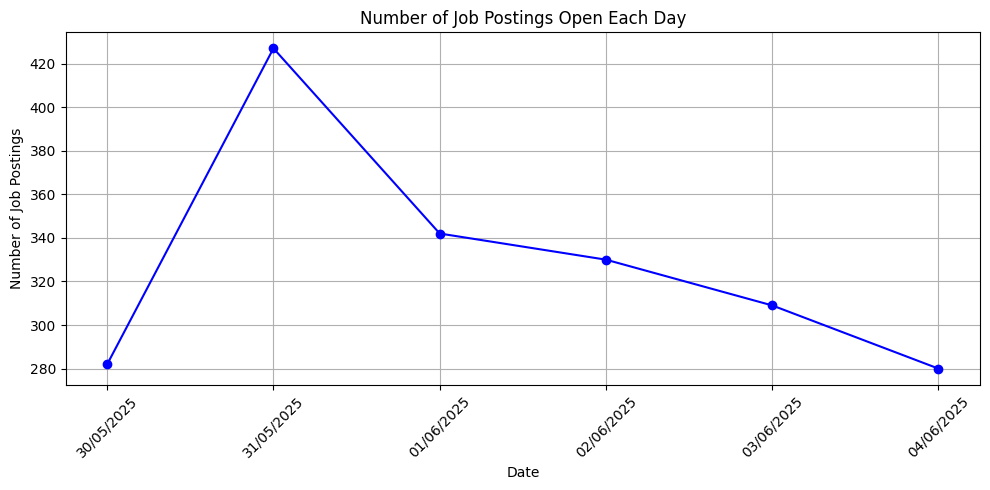

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from utils import parse_date

# Flatten occurrence dates
all_dates = []
for occ_list in df['occurrences'].dropna():
    if isinstance(occ_list, list):
        all_dates.extend(occ_list)
    elif isinstance(occ_list, str):
        all_dates.append(occ_list)

# Parse dates
date_objects = [parse_date(d) for d in all_dates]

# Count occurrences per date
date_counts = Counter(date_objects)

# Sort dates
sorted_dates = sorted(date_counts.items())
dates, counts = zip(*sorted_dates)

plt.figure(figsize=(10, 5))
plt.plot(dates, counts, marker='o', linestyle='-', color='b')

plt.title("Number of Job Postings Open Each Day")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(True)

# Set major locator and formatter for dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # Tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Format as DD/MM/YYYY

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



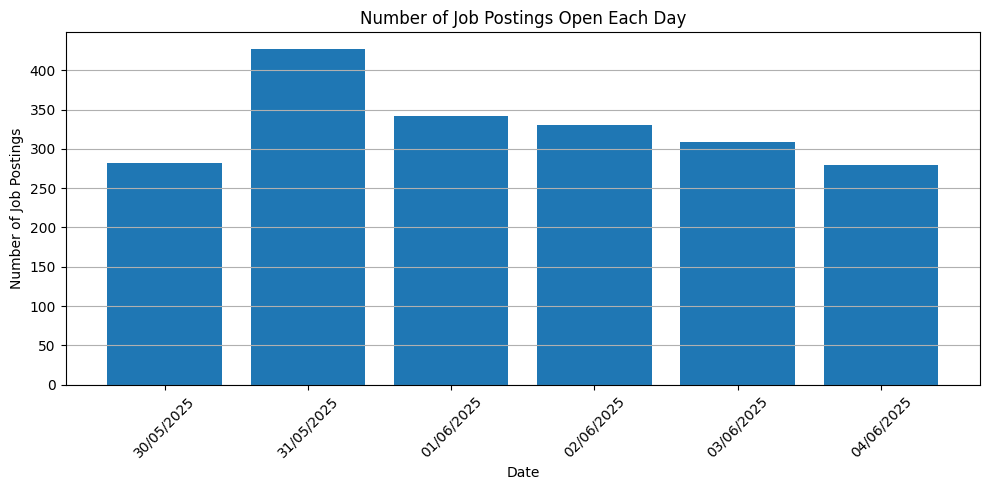

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from utils import parse_date

# Flatten occurrence dates
all_dates = []
for occ_list in df['occurrences'].dropna():
    if isinstance(occ_list, list):
        all_dates.extend(occ_list)
    elif isinstance(occ_list, str):
        all_dates.append(occ_list)

# Parse dates
date_objects = [parse_date(d) for d in all_dates]

# Count occurrences per date
date_counts = Counter(date_objects)

# Sort dates
sorted_dates = sorted(date_counts.items())
dates, counts = zip(*sorted_dates)

plt.figure(figsize=(10, 5))
plt.bar(dates, counts)

plt.title("Number of Job Postings Open Each Day")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(axis='y')

# Format dates on x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # one tick per day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # DD/MM/YYYY format

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Most common keywords in job titles (raw data)

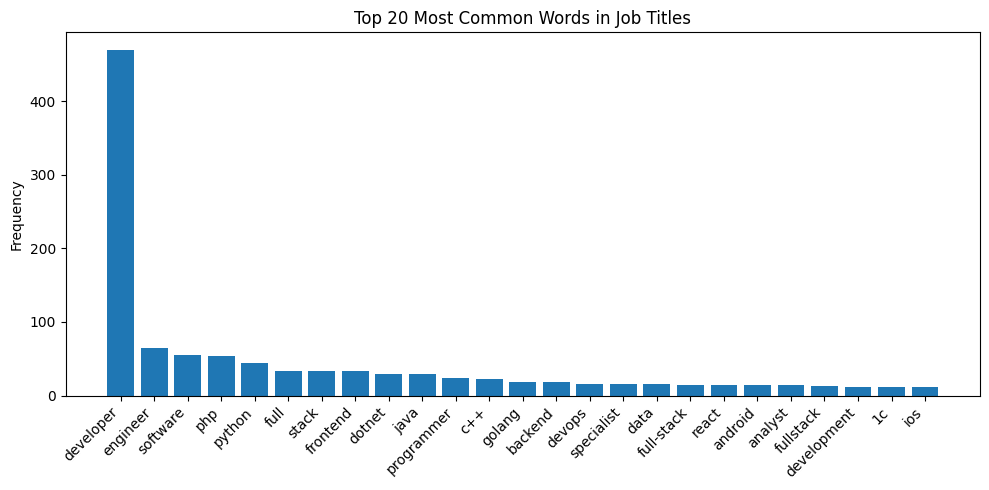

Full list of word frequencies:

developer            470
engineer             64
software             55
php                  54
python               44
full                 34
stack                34
frontend             34
dotnet               30
java                 30
programmer           24
c++                  22
golang               18
backend              18
devops               16
specialist           16
data                 16
full-stack           15
react                15
android              15
analyst              14
fullstack            13
development          12
1c                   11
ios                  11
administrator        11
qa                   11
business             11
it                   11
web                  11
net                  10
native               9
ai                   8
manager              8
wordpress            8
oracle               7
javascript           6
automation           6
technical            6
support              6
internship      

In [7]:
# most common words in job titles

# Flatten all words into a single list
all_words = [word for title in df['title'].dropna() for word in title.split()]

# Count occurrences
word_counts = Counter(all_words)

# Plot top 20 most common words
top_words = dict(word_counts.most_common(25))
plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Most Common Words in Job Titles')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Print full list sorted by frequency
print("Full list of word frequencies:\n")
for word, count in word_counts.most_common():
    print(f"{word:20} {count}")

In [8]:
# Raw, non processed titles
# Get the value counts of the 'title' column
title_counts = df['title'].value_counts()

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

# Display all job title occurrences
print("All Job Title Occurrences:")
print(title_counts)

All Job Title Occurrences:
title
php developer                        48
software developer                   40
python developer                     38
full stack developer                 32
frontend developer                   31
java developer                       30
dotnet developer                     23
c++ developer                        22
backend developer                    16
golang developer                     16
full-stack developer                 15
android developer                    15
devops engineer                      13
1c programmer                        11
ios developer                        11
web developer                         9
react native developer                9
software engineer                     9
fullstack developer                   7
net developer                         7
wordpress developer                   6
data engineer                         6
javascript developer                  5
front end developer                   5
react d

# Chrrypick job positionswith regex

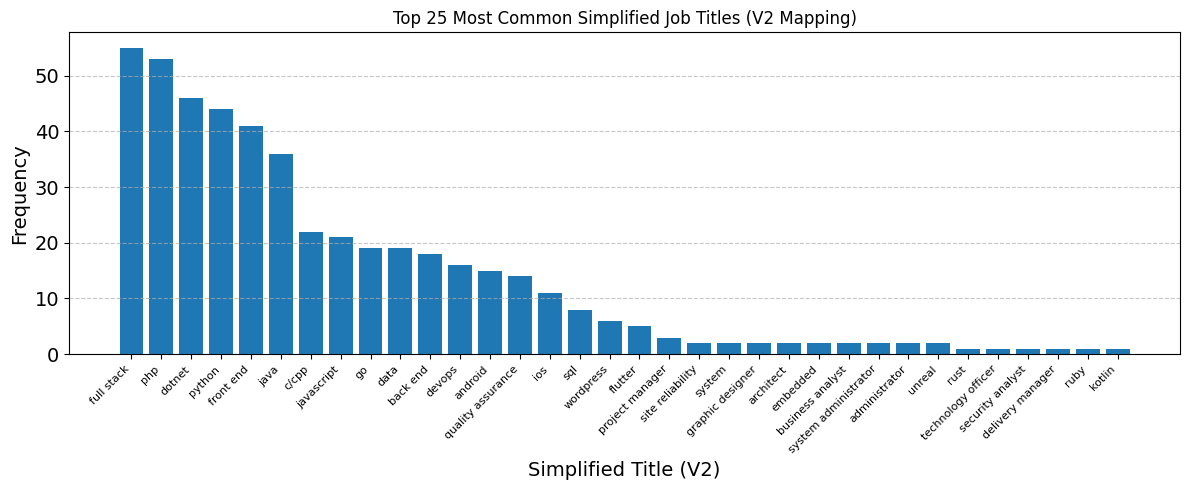


All Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):
simplified_title_reordered_v2
full stack              55
php                     53
dotnet                  46
python                  44
front end               41
java                    36
c/cpp                   22
javascript              21
go                      19
data                    19
back end                18
devops                  16
android                 15
quality assurance       14
ios                     11
sql                      8
wordpress                6
flutter                  5
project manager          3
site reliability         2
system                   2
graphic designer         2
architect                2
embedded                 2
business analyst         2
system administrator     2
administrator            2
unreal                   2
rust                     1
technology officer       1
security analyst         1
delivery manager         1
r

In [9]:
# Cherry Pick with regex best words

# 1. Define dictionary with keyword / simplified titles you experienceect (priority matters implicitly by order)
JOB_KEYWORD_MAPPING_REORDERED_V2 = {
    # Programming Languages (Prioritized and ordered by perceived commonality/specificity)
    'python': r'python',
    'kotlin': r'kotlin',
    'java': r'java|full stack java|spring',
    'dotnet': r'\.net|dot[-\s]?net|net|asp\.net|aspdotdotnet|dotnetwork|dotdotnet|csharp/dotdotnet|aspdotdotnet dotdotnet|dotdotnet core|dotdotnet developers|c#|c[-\s]?sharp|csharp|asp\.net|dotdotnet',
    'javascript': r'node\.?js|nodejavascript|reactjs|react|react native|angularjs|angular|vue.javascript|vue.js', # Combining related JS frameworks
    'php': r'php symfony|php',
    'go': r'golang|go',
    'rust': r'rust',
    'swift': r'swift',
    'haskel': r'haskel|lisp',
    'ruby': r'ruby|rails', # Assuming Rails is specific to Ruby
    'c/cpp': r'c\+\+|c/cpp',
    'sql': r'sql|oracle|microsoft dynamics', # Databases related to programming

    # Mobile Development
    'ios': r'ios',
    'android': r'android',
    'flutter': r'flutter/dart|flutter',

    # Front-End and Back-End (Full Stack below)
    'front end': r'front[-\s]?end',
    'back end': r'back[-\s]?end|dotdotnet back end|back end nodejavascript',
    'full stack': r'full[-\s]?stack|full stack web|full stack web development|full stack development|arhitect full stack|dezvoltator full stack|full stack php|full stack dotdotnet',

    # Quality Assurance
    'quality assurance': r'qa|quality assurance|quality assurance analyst|automation quality assurance|quality assurance tester|tester',

    # Data Related
    'data': r'data analyst|data|data analyst data scientist|etl data tester|data steward',

    # DevOps and System Administration
    'devops': r'devops|azure devops|system devops',
    'system administrator': r'system administrator|linux dotnetwork administrator|system administrator helpdesk|web administrator',
    'linux administrator': r'linux',
    'monitoring operator': r'monitoring operator',
    'infrastructure support': r'infrastructure support',
    'system': r'system|linux dotnetwork system administrator',

    # Management/Leadership
    'project manager': r'project manager|software project manager',
    'product manager': r'product manager',
    'technology officer': r'technology officer',
    'delivery manager': r'delivery manager',
    'team lead': r'team lead', # Assuming this was a desired category (not in original, but often relevant)
    'architect': r'architect',

    # Analysis and Design
    'business analyst': r'business analyst|business analyst project coordinator',
    'ui ux designer': r'ui[/]?ux',
    'erp analyst': r'erp analyst',
    'market research analyst': r'market research analyst',
    'graphic designer': r'grafic designer|graphic designer|designer',
    'artist': r'artist',

    # Other Technical Roles
    'embedded': r'embedded|mcu',
    'unreal': r'unreal engine|unreal game |unrealdeveloper',
    'security analyst': r'security analyst',
    'cybersecurity': r'cybersecurity',
    'site reliability': r'site reliability',
    'mobile application': r'mobile application', # Keeping it here as it's a type of application
    'web': r'веб|веб-программист|web designer', # Broader web category
    'r&d': r'r&d',
    'wordpress': r'wordpress', # Could be web development, but often distinct
    'administrator': r'administrator', # Very general
        
    'UNKNOWN': 'other', # Default category if no keyword is found
}

def categorize_title_reordered_v2(title):
    """
    Passes through the job title and categorizes it based on the reordered
    predefined keywords with programming languages on top, full stack below
    front/back end, and iOS/Android higher.
    """
    if isinstance(title, str):
        processed_title = title.lower().strip()
        processed_title = re.sub(r'\([^)]*\)', '', processed_title).strip() # Remove parentheses content

        for category, pattern in JOB_KEYWORD_MAPPING_REORDERED_V2.items():
            if re.search(pattern, processed_title):
                return category
        return 'other'
    return 'other'

# Recalculate categorization
df['simplified_title_reordered_v2'] = df['title'].apply(categorize_title_reordered_v2)


# Get the value counts of the prioritized simplified titles (version 2)
simplified_title_counts_reordered_v2 = df['simplified_title_reordered_v2'].value_counts()

# remove other keyword
del simplified_title_counts_reordered_v2["other"]

plt.figure(figsize=(12, 5))
plt.bar(simplified_title_counts_reordered_v2.index, simplified_title_counts_reordered_v2.values)
plt.title('Top 25 Most Common Simplified Job Titles (V2 Mapping)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Simplified Title (V2)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Display all prioritized simplified job title occurrences (version 2)
print("\nAll Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):")
print(simplified_title_counts_reordered_v2)


In [10]:
import pandas as pd
from collections import defaultdict, Counter

def get_ngrams(text, n):
    """
    Generates a set of n-grams from the given text.

    Args:
        text (str): The input text.
        n (int): The length of the n-grams.

    Returns:
        set: A set of n-grams.  Returns an empty set if text is shorter than n.
    """
    if len(text) < n:
        return set()
    return set(text[i:i+n] for i in range(len(text) - n + 1))

def ngram_similarity(term1, term2, n=3):
    """
    Calculates the n-gram similarity between two terms.

    Args:
        term1 (str): The first term.
        term2 (str): The second term.
        n (int, optional): The length of the n-grams. Defaults to 3.

    Returns:
        float: The n-gram similarity (between 0 and 1). Returns 0 if both terms are empty.
    """
    ngrams1 = get_ngrams(term1, n)
    ngrams2 = get_ngrams(term2, n)
    intersection = ngrams1.intersection(ngrams2)
    union = ngrams1.union(ngrams2)
    return len(intersection) / len(union) if union else 0.0  # Handle empty case

def cluster_terms_by_ngram_similarity(df, column_name, similarity_threshold=0.15, n=3, b_print=False):
    """
    Clusters terms in a DataFrame column based on n-gram similarity, and prints the clusters.

    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 3.
    """
    # 1. Extract and flatten the list of terms, handling NaNs robustly
    all_things = [tech for tech_list in df[column_name].dropna() for tech in (tech_list if isinstance(tech_list, list) else [tech_list])]

    # 2. Count occurrences of each term
    counts = Counter(all_things)

    # 3. Initialize data structures for clustering
    clusters = defaultdict(list)
    terms = list(counts.keys())
    assigned = set()

    # 4. Perform the clustering
    for i, term1 in enumerate(terms):
        if i not in assigned:
            clusters[term1].append(term1)
            assigned.add(i)
            for j in range(i + 1, len(terms)):
                if j not in assigned:
                    similarity = ngram_similarity(term1, terms[j], n=n)
                    if similarity >= similarity_threshold:
                        clusters[term1].append(terms[j])
                        assigned.add(j)

    if b_print == True:
        # 5. Print the results
        print(f"Potential Clusters (N-gram, Threshold={similarity_threshold}, N={n}):")
        if not clusters:
            print("No clusters found.")  # Handle the case where no clusters are formed.
            return
    
        for key, value in clusters.items():
            if len(value) > 1:
                print(f"  {key}: {', '.join(value)}")
            
    return clusters #returning the clusters, in case the user wants to use them

In [11]:
def analyze_and_visualize_consolidated_terms(df, column_name, similarity_threshold=0.15, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True):
    """
    Analyzes, consolidates, and visualizes terms from a specified DataFrame column,
    grouping similar terms based on n-gram similarity.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 2.
        top_n (int, optional): Number of top terms to visualize. Defaults to 20.
        figsize (tuple, optional): Figure size for the plot. Defaults to (10, 5).
        rotation (int, optional): Rotation angle for x-axis labels. Defaults to 45.
        show_details (bool, optional): Whether to print consolidation details. Defaults to True.
        
    Returns:
        tuple: (consolidated_counts, clusters) - Counter object with consolidated counts and clusters dictionary
    """
    import matplotlib.pyplot as plt
    from collections import Counter
    
    # Extract and flatten all terms from the specified column
    all_terms = [term for term_list in df[column_name].dropna() for term in 
                (term_list if isinstance(term_list, list) else [term_list])]
    
    # Count occurrences
    original_counts = Counter(all_terms)
    
    # Generate clusters
    clusters = cluster_terms_by_ngram_similarity(df, column_name, 
                                               similarity_threshold=similarity_threshold, n=n)
    
    # Create a mapping from each term to its cluster representative (the cluster key)
    term_to_cluster = {}
    for cluster_key, terms in clusters.items():
        for term in terms:
            term_to_cluster[term] = cluster_key
    
    # Consolidate counts based on clusters
    consolidated_counts = Counter()
    for term, count in original_counts.items():
        # If the term is in a cluster, add its count to the cluster key
        if term in term_to_cluster:
            consolidated_counts[term_to_cluster[term]] += count
        else:
            # If not in any cluster, keep it as is
            consolidated_counts[term] += count
    
    # Plot top N most common consolidated terms
    top_terms = dict(consolidated_counts.most_common(top_n))
    plt.figure(figsize=figsize)
    plt.bar(top_terms.keys(), top_terms.values())
    plt.title(f'Top {top_n} Most Common {column_name.capitalize()}')
    plt.xticks(rotation=rotation, ha='right')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # Print full list sorted by frequency
    print(f"Full list of consolidated {column_name} term frequencies:\n")
    for term, count in consolidated_counts.most_common():
        print(f"{term:20} {count}")
    
    # Optionally, print which terms were consolidated
    if show_details:
        print("\nConsolidation details:")
        for cluster_key, terms in clusters.items():
            if len(terms) > 1:
                total_count = sum(original_counts[term] for term in terms)
                print(f"{cluster_key} ({total_count}): {', '.join(terms)}")
    
    return consolidated_counts, clusters

In [12]:
GENERIC_JOB_KEYWORD_MAPPING = {
    # Programming Roles
    'backend': r'\b(back[-\s]?end|node\.?js|golang|php|ruby|rails|python|java|dotnet|net|\.net|asp\.net|c#|c[-\s]?sharp|c\+\+|c/cpp)\b',
    'frontend': r'\b(front[-\s]?end|react(\.js)?|angular(\.js)?|vue(\.js)?|javascript|html|css)\b',
    'full stack': r'\bfull[-\s]?stack\b',
    
    # Mobile Development
    'mobile developer': r'\b(android|ios|flutter|react native|mobile application|kotlin)\b',

    # Data/Analytics
    'data': r'\b(data|data analyst|etl|data scientist|data steward|sql|oracle)\b',

    # Quality Assurance / Testing
    # 'qa tester': r'\b(qa|quality assurance|tester|automation)\b',

    # DevOps and Infrastructure
    'devops': r'\b(devops|azure devops|site reliability|infrastructure support)\b',
    # 'sysadmin': r'\b(system administrator|linux|web administrator|monitoring operator|administrator)\b',

    # UI/UX & Design
    # 'ui/ux designer': r'\b(ui[/]?[ ]?ux|designer|graphic designer|grafic designer)\b',

    # Management & Lead Roles
    # 'manager': r'\b(project manager|product manager|delivery manager|team lead|technology officer|architect)\b',

    # Analyst & Business Roles
    # 'analyst': r'\b(business analyst|market research analyst|erp analyst)\b',

    # Security
    # 'security': r'\b(security analyst|cybersecurity)\b',

    # Game
    'gamedev': r'\b(unity|unreal engine|unreal|godot)\b',

    # Web Development (broad)
    # 'web': r'\b(web|wordpress|веб|веб-программист)\b',

    # Research & Development
    # 'r&d': r'\br&d\b',

    # Fallback
    # 'other': r'.*',
}


In [13]:
def extract_generic_title(title, mapping):
    if not isinstance(title, str):
        return None
    for generic_title, pattern in mapping.items():
        if re.search(pattern, title, flags=re.IGNORECASE):
            return generic_title
    return None

df['generic_title'] = df['title'].apply(lambda x: extract_generic_title(x, GENERIC_JOB_KEYWORD_MAPPING))

In [14]:
import pandas as pd
from collections import Counter

filtered_df = df[df['generic_title'].notna()]

# Store counts per job title
tech_data = {}
soft_data = {}

for job in filtered_df['generic_title'].unique():
    subset = filtered_df[filtered_df['generic_title'] == job]
    
    # Tech skills counts
    tech_skills = [skill for skills_list in subset['hard_skills'].dropna() for skill in skills_list]
    tech_counts = Counter(tech_skills)
    tech_data[job] = tech_counts
    
    # Soft skills counts
    soft_skills = [skill for skills_list in subset['soft_skills'].dropna() for skill in skills_list]
    soft_counts = Counter(soft_skills)
    soft_data[job] = soft_counts

def build_ranked_df(skill_data, top_n=10):
    jobs = list(skill_data.keys())
    ranked_dict = {job: [] for job in jobs}
    
    # Build lists of top skills with counts as strings per job
    for job in jobs:
        top_skills = skill_data[job].most_common(top_n)
        ranked_dict[job] = [f"{skill} ({count})" for skill, count in top_skills]
        
        # Pad with empty strings if less than top_n skills
        if len(ranked_dict[job]) < top_n:
            ranked_dict[job].extend([''] * (top_n - len(ranked_dict[job])))
    
    # Create DataFrame with ranks as index
    ranked_df = pd.DataFrame(ranked_dict, index=[f"Rank {i+1}" for i in range(top_n)])
    return ranked_df

# Create ranked DataFrames
tech_ranked_df = build_ranked_df(tech_data, top_n=25)
soft_ranked_df = build_ranked_df(soft_data, top_n=25)

# Hard and Soft Skills by job position

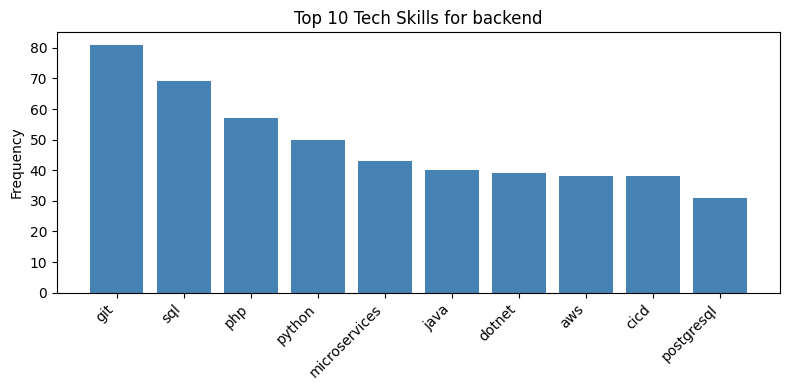

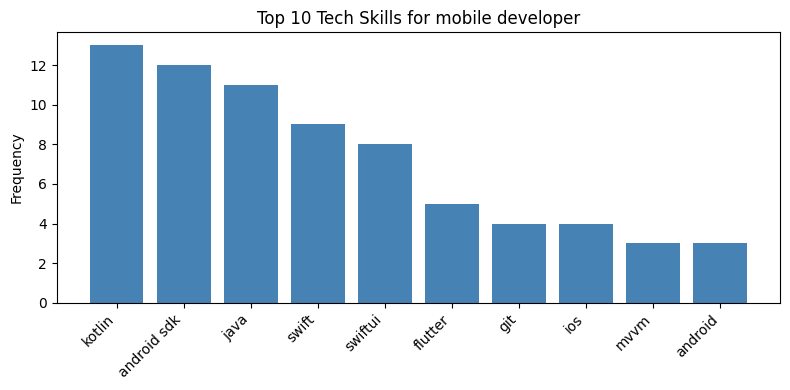

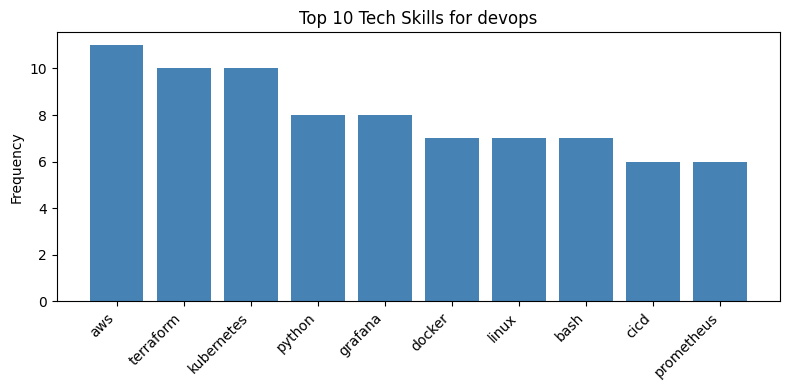

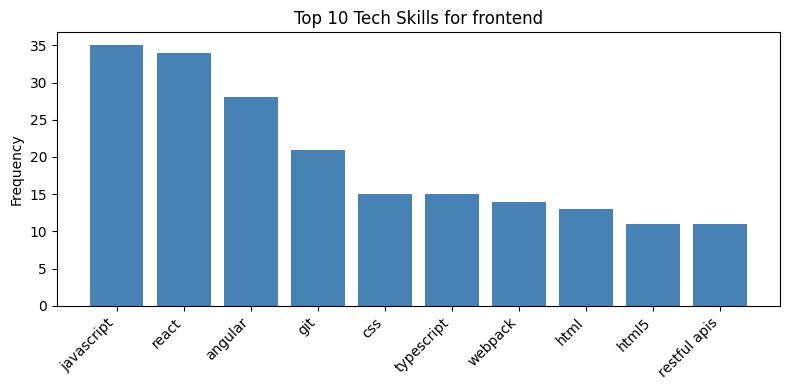

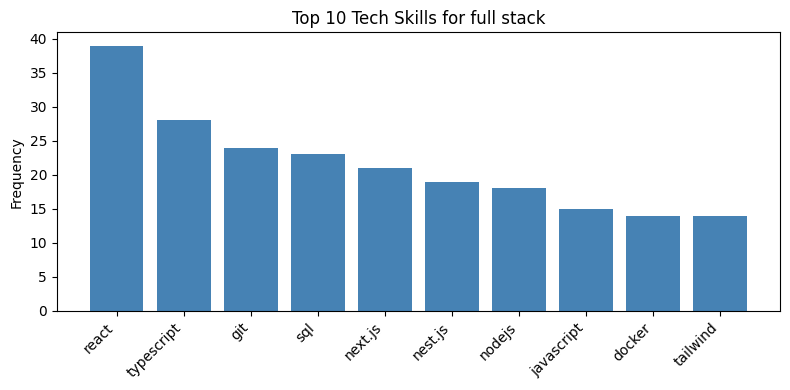

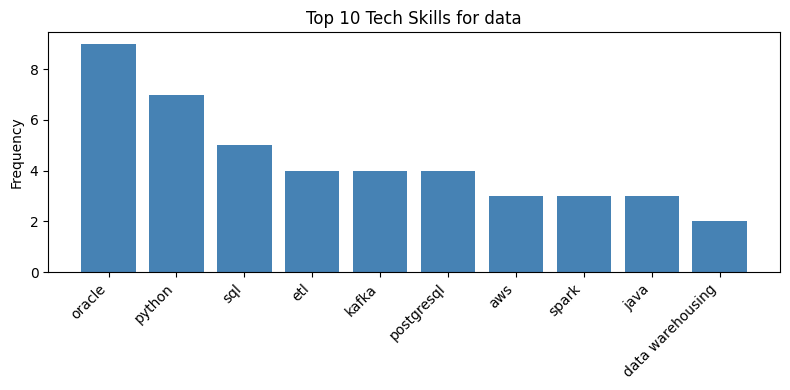

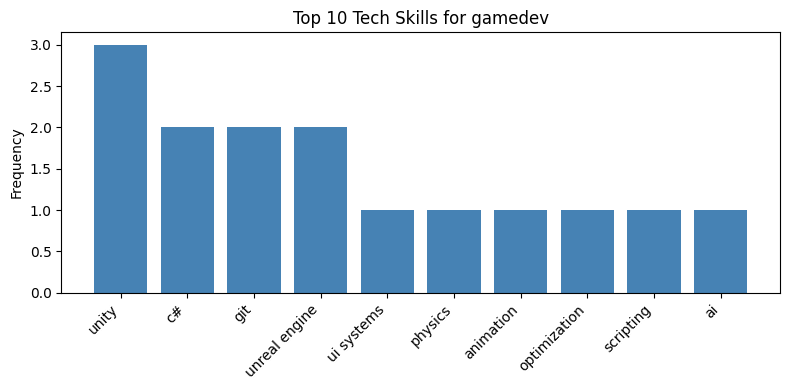

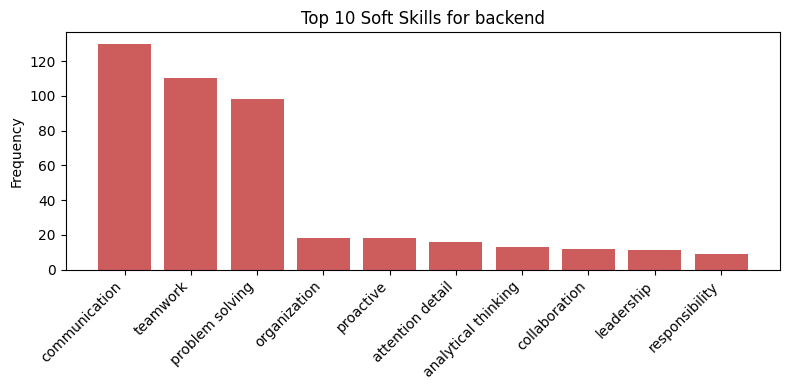

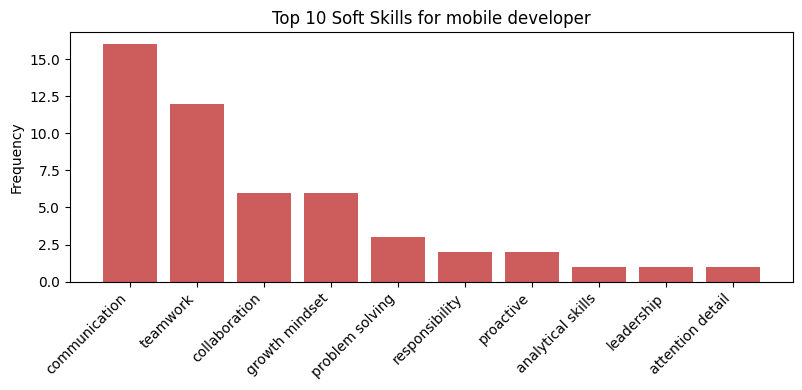

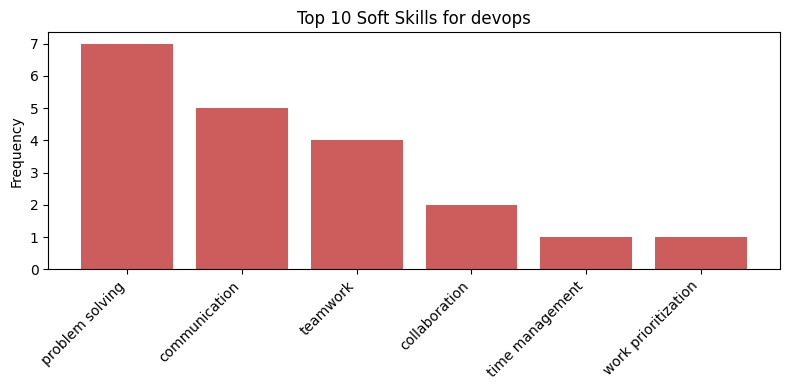

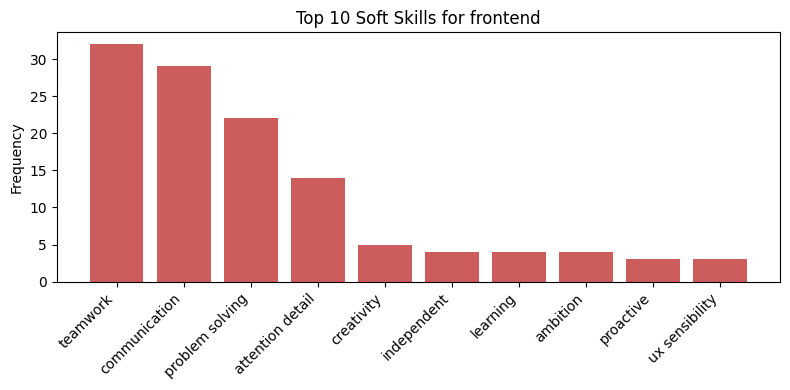

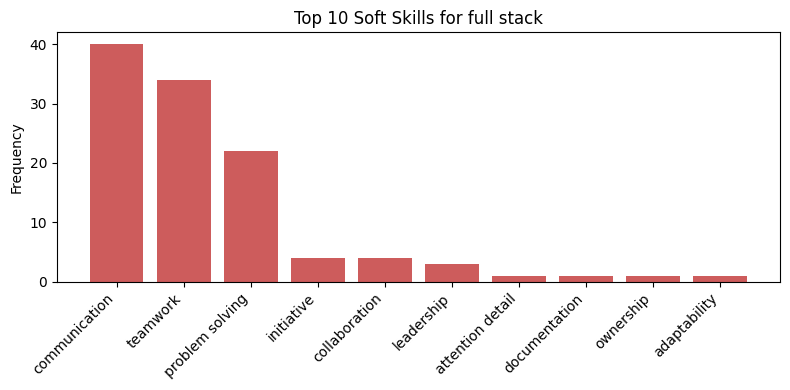

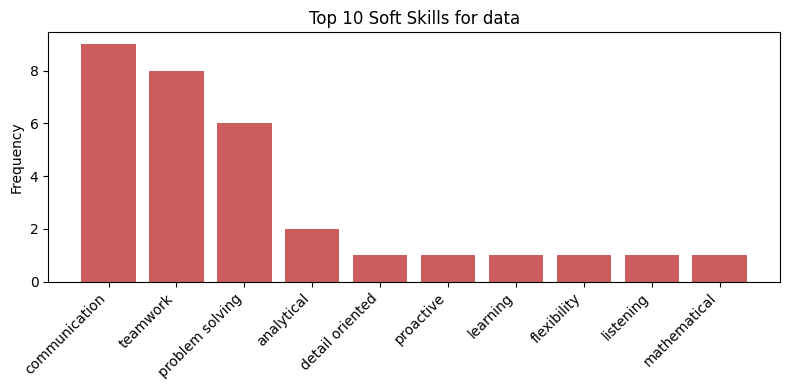

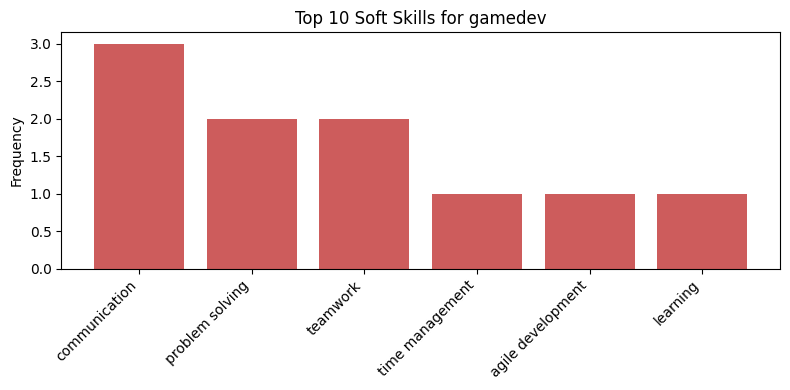

In [15]:
# Create DataFrame for tech skills counts
# Plot tech skills (top 10 per job)
for job in filtered_df['generic_title'].unique():
    tech_counts = tech_data[job].most_common(10)
    if tech_counts:
        skills, counts = zip(*tech_counts)
        plt.figure(figsize=(8, 4))
        plt.bar(skills, counts, color='steelblue')
        plt.title(f'Top 10 Tech Skills for {job}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

# Plot soft skills (top 10 per job)
for job in filtered_df['generic_title'].unique():
    soft_counts = soft_data[job].most_common(10)
    if soft_counts:
        skills, counts = zip(*soft_counts)
        plt.figure(figsize=(8, 4))
        plt.bar(skills, counts, color='indianred')
        plt.title(f'Top 10 Soft Skills for {job}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


## Hard skills table

In [16]:
# Display
# print("\n=== Top 25 Tech Skills per Job ===")
display(tech_ranked_df)

,backend,mobile developer,devops,frontend,full stack,data,gamedev
Rank 1,git (81),kotlin (13),aws (11),javascript (35),react (39),oracle (9),unity (3)
Rank 2,sql (69),android sdk (12),terraform (10),react (34),typescript (28),python (7),c# (2)
Rank 3,php (57),java (11),kubernetes (10),angular (28),git (24),sql (5),git (2)
Rank 4,python (50),swift (9),python (8),git (21),sql (23),etl (4),unreal engine (2)
Rank 5,microservices (43),swiftui (8),grafana (8),css (15),next.js (21),kafka (4),ui systems (1)
Rank 6,java (40),flutter (5),docker (7),typescript (15),nest.js (19),postgresql (4),physics (1)
Rank 7,dotnet (39),git (4),linux (7),webpack (14),nodejs (18),aws (3),animation (1)
Rank 8,aws (38),ios (4),bash (7),html (13),javascript (15),spark (3),optimization (1)
Rank 9,cicd (38),mvvm (3),cicd (6),html5 (11),docker (14),java (3),scripting (1)
Rank 10,postgresql (31),android (3),prometheus (6),restful apis (11),tailwind (14),data warehousing (2),ai (1)


## Soft skills table

In [17]:
# print("\n=== Top 25 Soft Skills per Job ===")
display(soft_ranked_df)

,backend,mobile developer,devops,frontend,full stack,data,gamedev
Rank 1,communication (130),communication (16),problem solving (7),teamwork (32),communication (40),communication (9),communication (3)
Rank 2,teamwork (110),teamwork (12),communication (5),communication (29),teamwork (34),teamwork (8),problem solving (2)
Rank 3,problem solving (98),collaboration (6),teamwork (4),problem solving (22),problem solving (22),problem solving (6),teamwork (2)
Rank 4,organization (18),growth mindset (6),collaboration (2),attention detail (14),initiative (4),analytical (2),time management (1)
Rank 5,proactive (18),problem solving (3),time management (1),creativity (5),collaboration (4),detail oriented (1),agile development (1)
Rank 6,attention detail (16),responsibility (2),work prioritization (1),independent (4),leadership (3),proactive (1),learning (1)
Rank 7,analytical thinking (13),proactive (2),,learning (4),attention detail (1),learning (1),
Rank 8,collaboration (12),analytical skills (1),,ambition (4),documentation (1),flexibility (1),
Rank 9,leadership (11),leadership (1),,proactive (3),ownership (1),listening (1),
Rank 10,responsibility (9),attention detail (1),,ux sensibility (3),adaptability (1),mathematical (1),


# Most common occurences of keywords

## Responsabilities

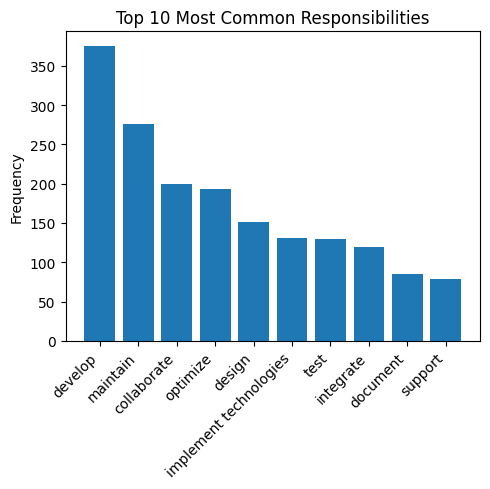

Full list of consolidated responsibilities term frequencies:

develop              375
maintain             276
collaborate          199
optimize             193
design               151
implement technologies 131
test                 130
integrate            120
document             85
support              79
review               56
improve              54
debug                49
analyze              43
manage               42
troubleshoot         42
build                41
deploy               36
mentor               32
generate             32
monitor              31
define               30
correct responses    29
resolve              25
lead                 23
participate          23
write                22
contribute           18
configure            18
deliver              18
communicate          16
ensure               16
create test cases    16
fix                  14
scale                13
code                 12
plan                 12
train                11
automate        

In [18]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'responsibilities', similarity_threshold=0.34, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Hard Skills

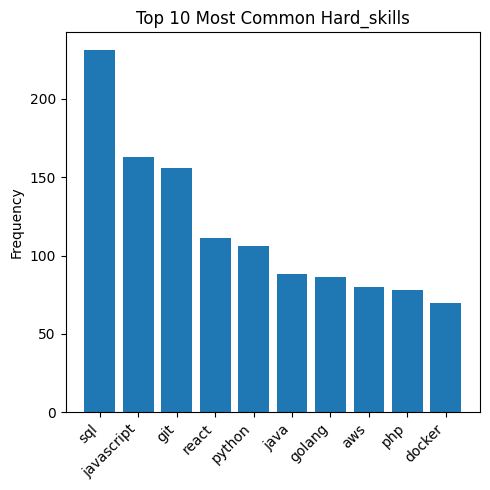

Full list of consolidated hard_skills term frequencies:

sql                  231
javascript           163
git                  156
react                111
python               106
java                 88
golang               86
aws                  80
php                  78
docker               70
web services         70
linux                67
html                 66
postgresql           64
cicd                 63
css                  63
rest                 63
dotnet               55
nestjs               51
kubernetes           46
c++                  42
nodejs               37
android              37
restful api          36
azure                35
vue                  35
ai                   34
tailwind css         34
mongodb              34
spring boot          34
laravel              30
next.js              30
redis                30
nagios               29
google cloud         29
kafka                28
terraform            26
nginx                25
cypress              25
or

In [19]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'hard_skills', similarity_threshold=0.34, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Soft Skills

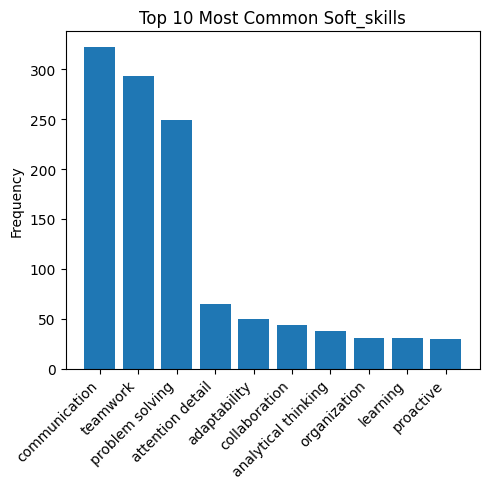

Full list of consolidated soft_skills term frequencies:

communication        322
teamwork             293
problem solving      249
attention detail     65
adaptability         50
collaboration        44
analytical thinking  38
organization         31
learning             31
proactive            30
leadership           27
motivated            24
responsibility       21
independence         11
interpersonal        9
mentorship           9
time management      8
multitasking         7
initiative           6
creativity           6
growth mindset       6
ambition             5
fast learner         5
detail oriented      4
documentation        4
flexibility          4
results-oriented     4
negotiation          3
customer oriented    3
patience             3
professionalism      2
agile development    2
autonomous           2
self-improvement     2
eager to grow        2
innovation           2
commitment           2
precision            1
work prioritization  1
passion              1
listen

In [20]:
soft_counts, soft_clusters = analyze_and_visualize_consolidated_terms(df, 'soft_skills', similarity_threshold=0.4, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Benefits

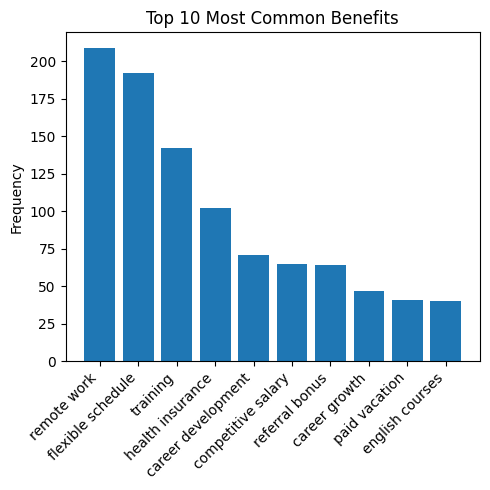

Full list of consolidated benefits term frequencies:

remote work          209
flexible schedule    192
training             142
health insurance     102
career development   71
competitive salary   65
referral bonus       64
career growth        47
paid vacation        41
english courses      40
corporate gifts      39
unlimited pto        39
paid holidays        39
paid lunch           37
team building        32
company perks        32
social package       29
sports compensation  29
maternity leave      28
transport            24
growth opportunities 23
medical coverage     20
psychological support 20
performance bonus    20
hybrid work          20
comprehensive benefits 19
sick leave           17
fitness discounts    16
childcare budget     16
professional growth  15
language classes     15
meal tickets         14
travel               14
education bonuses    13
portfolio enhancement 13
equipment            11
snacks               11
work-life balance    11
modern office        10
gy

In [21]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'benefits', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Languages

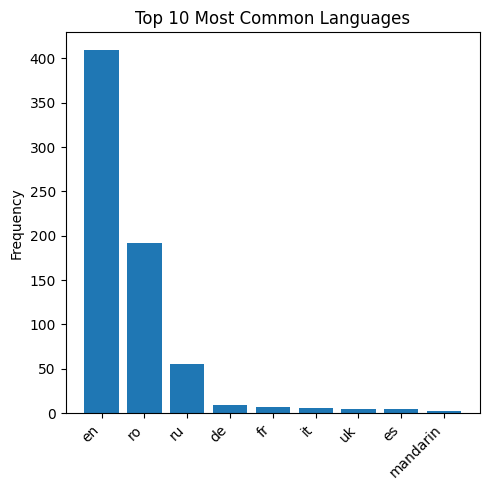

Full list of consolidated languages term frequencies:

en                   409
ro                   192
ru                   55
de                   9
fr                   7
it                   6
uk                   5
es                   5
mandarin             3

Consolidation details:


In [22]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'languages', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Education

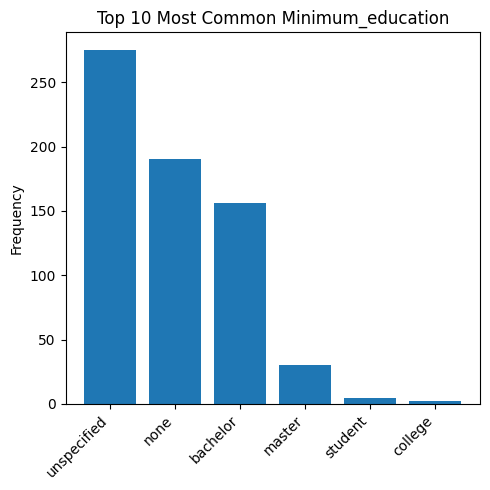

Full list of consolidated minimum_education term frequencies:

unspecified          275
none                 190
bachelor             156
master               30
student              5
college              2

Consolidation details:


In [23]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'minimum_education', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

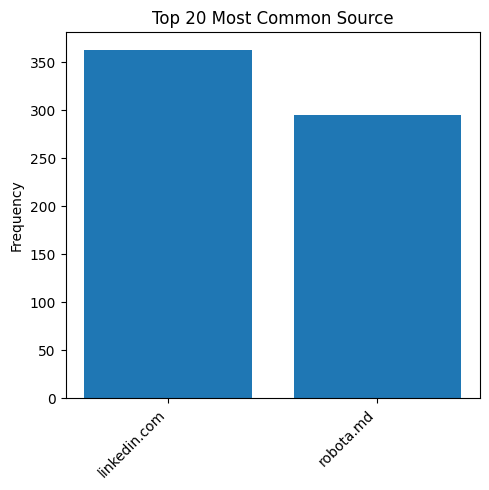

Full list of consolidated source term frequencies:

linkedin.com         363
robota.md            295

Consolidation details:


In [24]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'source', similarity_threshold=0.5, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Company Name

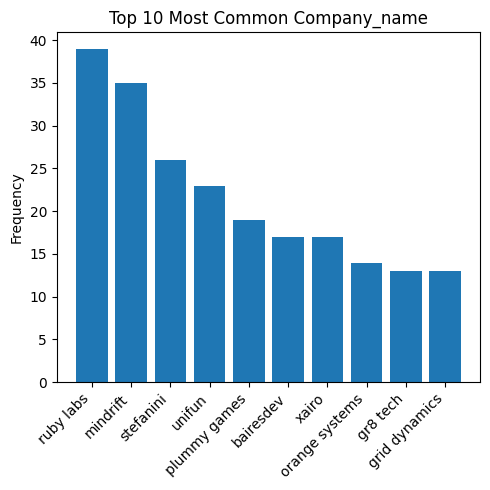

Full list of consolidated company_name term frequencies:

ruby labs            39
mindrift             35
stefanini            26
unifun               23
plummy games         19
bairesdev            17
xairo                17
orange systems       14
gr8 tech             13
grid dynamics        13
amdaris              12
confidential co.     12
micro1               11
coherent solutions   10
ion                  10
adtelligent          9
orange moldova       8
mixbook              8
endava               8
nextapp              8
gilat satellite networks 8
loleworks            8
ebs integrator       7
s&t mold             7
hr consulting        7
braintrust           7
backstageit          6
dyninno              6
maib                 6
midnight works       5
meta-sistem s.r.l.   5
kivork               5
zazitex              5
moldindconbank       5
identi               5
canonical            5
brainrocket          5
proxify              5
proovia it           4
tara interactive     4
ava

In [25]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_name', similarity_threshold=0.5, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Company Size

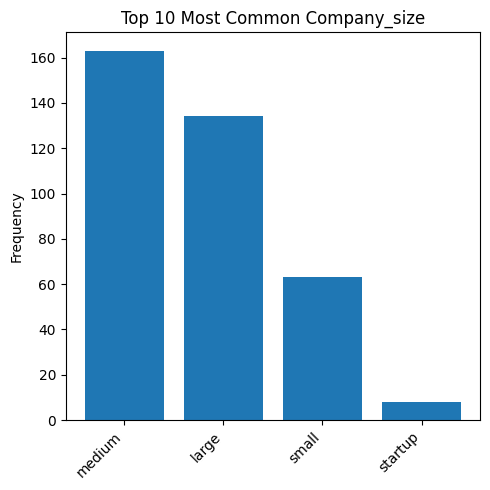

Full list of consolidated company_size term frequencies:

medium               163
large                134
small                63
startup              8

Consolidation details:


In [26]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_size', similarity_threshold=0.4, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

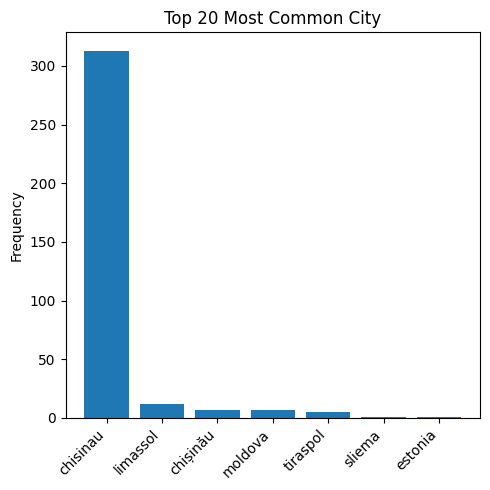

Full list of consolidated city term frequencies:

chisinau             313
limassol             12
chișinău             7
moldova              7
tiraspol             5
sliema               1
estonia              1

Consolidation details:


In [27]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'city', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

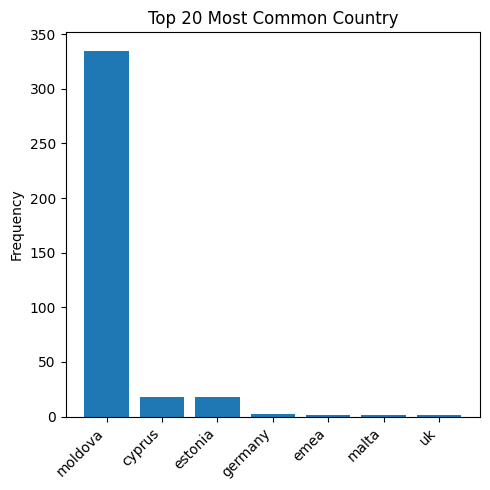

Full list of consolidated country term frequencies:

moldova              335
cyprus               18
estonia              18
germany              2
emea                 1
malta                1
uk                   1

Consolidation details:


In [28]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'country', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

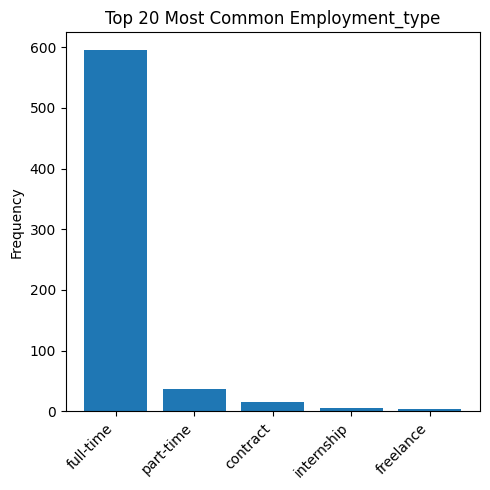

Full list of consolidated employment_type term frequencies:

full-time            595
part-time            36
contract             15
internship           6
freelance            3

Consolidation details:


In [29]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'employment_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

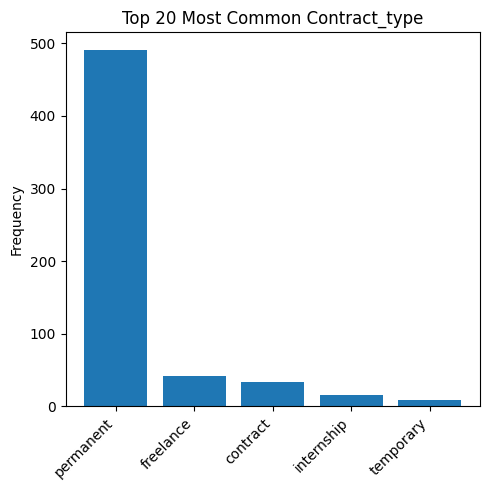

Full list of consolidated contract_type term frequencies:

permanent            491
freelance            42
contract             33
internship           15
temporary            8

Consolidation details:


In [30]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'contract_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Work Schedule

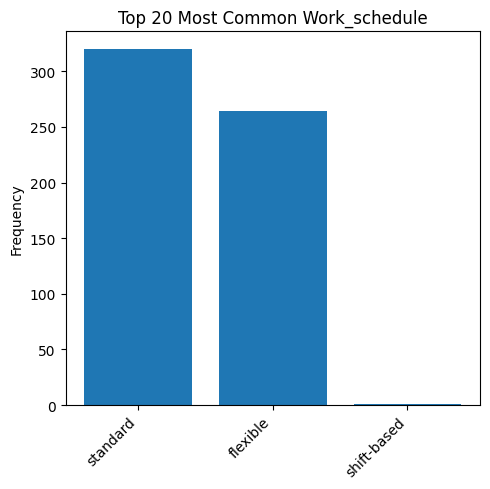

Full list of consolidated work_schedule term frequencies:

standard             320
flexible             264
shift-based          1

Consolidation details:


In [31]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'work_schedule', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Remote Work

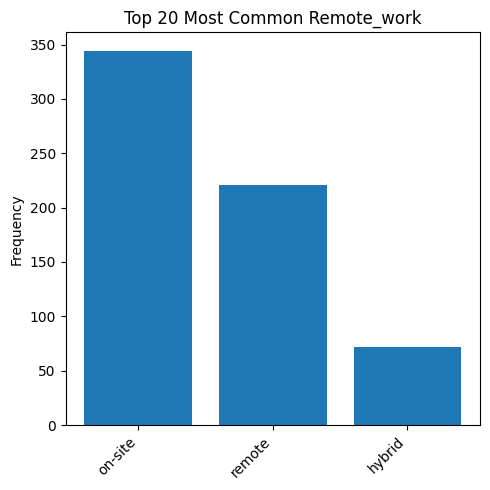

Full list of consolidated remote_work term frequencies:

on-site              344
remote               221
hybrid               72

Consolidation details:


In [32]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'remote_work', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

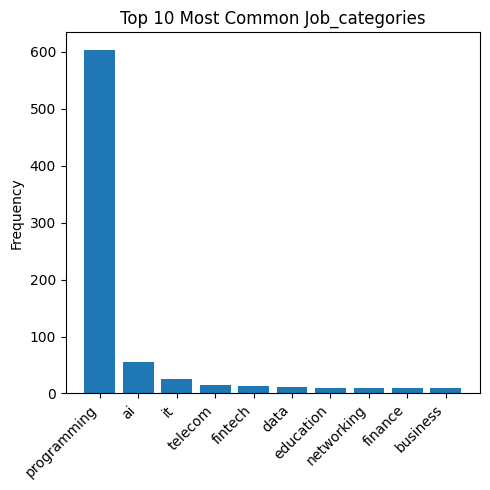

Full list of consolidated job_categories term frequencies:

programming          604
ai                   55
it                   26
telecom              14
fintech              13
data                 11
education            10
networking           10
finance              10
business             9
testing              8
web development      8
sales                8
it support           7
banking              6
management           6
system administration 5
technology           5
gamedev              4
cyber security       4
analysis             4
qa                   3
cloud                3
engineering          3
data analytics       3
human resources      2
hospitality          2
developer relations  2
devops               2
construction         1
travel               1
accounting           1
supply chain         1
design               1
it services          1
regional planning    1
blockchain           1
market research      1
consulting           1
iot                  1
ecommerce

In [33]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'job_categories', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Salary Currency

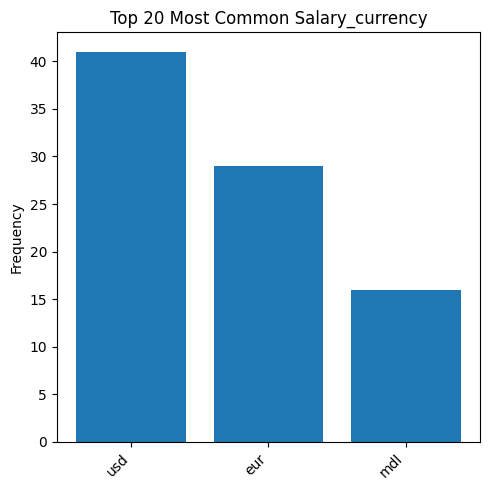

Full list of consolidated salary_currency term frequencies:

usd                  41
eur                  29
mdl                  16

Consolidation details:


In [34]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'salary_currency', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Experience Distribution

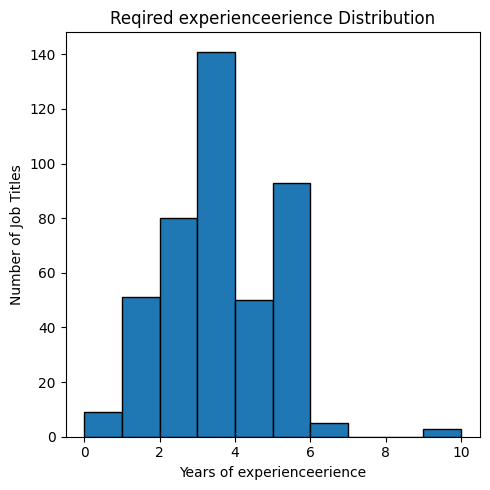

experienceerience Stats (After Dropping NaN):

count    432.000000
mean       3.145833
std        1.500048
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: experience, dtype: float64


In [35]:
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
df_clean = df.dropna(subset=['experience'])

# Plot experienceerience distribution
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(df_clean['experience'], bins=range(int(df_clean['experience'].min()), int(df_clean['experience'].max()) + 1), edgecolor='black')
ax.set_title('Reqired experienceerience Distribution')
ax.set_xlabel('Years of experienceerience')
ax.set_ylabel('Number of Job Titles')
plt.tight_layout()
plt.show()

# Print experienceerience stats for cleaned data
print("experienceerience Stats (After Dropping NaN):\n")
print(df_clean['experience'].describe())


# Salary distribution

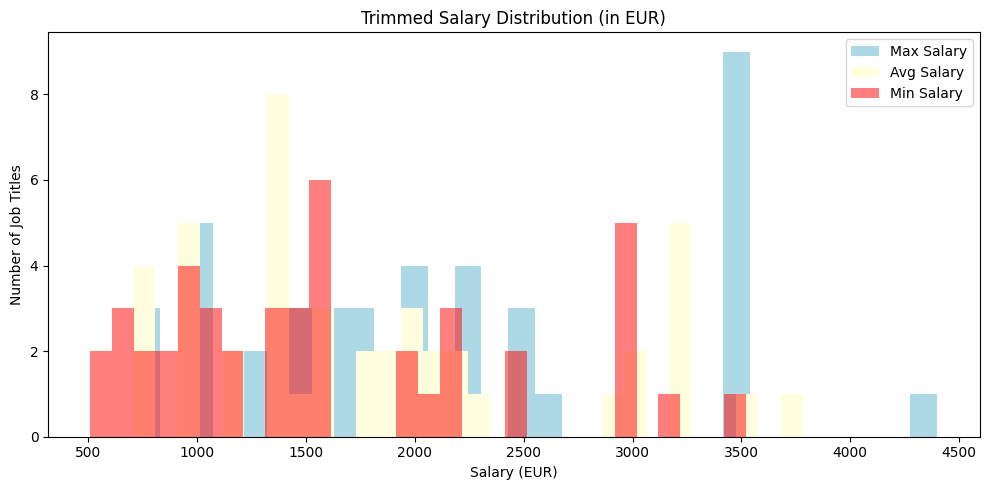

Salary Stats (on 45 salaries) (in EUR, After Conversion & Trimming):

       salary_min_eur  salary_avg_eur  salary_max_eur
count       45.000000       45.000000       45.000000
mean      1619.555556     1858.455556     2097.355556
std        822.816851      863.367231      971.793308
min        510.000000      704.000000      704.000000
25%       1000.000000     1320.000000     1320.000000
50%       1500.000000     1584.000000     1980.000000
75%       2200.000000     2200.000000     2600.000000
max       3520.000000     3784.000000     4400.000000


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is already loaded

# Conversion rates to EUR
currency_rates = {
    'usd': 0.88,
    'mdl': 0.051,
    'eur': 1.0,
    'gbp': 1.17
}

# Function to convert salary to EUR
def convert_to_eur(row):
    currency = (row.get('salary_currency') or '').lower()
    rate = currency_rates.get(currency)
    
    if rate and pd.notnull(row.get('min_salary')):
        min_salary_eur = row['min_salary'] * rate
        max_salary = row.get('max_salary')
        max_salary_eur = max_salary * rate if pd.notnull(max_salary) else None
    else:
        min_salary_eur = max_salary_eur = None
    
    return pd.Series([min_salary_eur, max_salary_eur])

# Convert salaries to EUR
df[['salary_min_eur', 'salary_max_eur']] = df.apply(convert_to_eur, axis=1)
df_clean = df.dropna(subset=['salary_min_eur', 'salary_max_eur']).copy()
df_clean['salary_avg_eur'] = (df_clean['salary_min_eur'] + df_clean['salary_max_eur']) / 2

# Sort and trim top/bottom 3 in each salary column
def trim_outliers(df, column, n=3):
    return df.sort_values(by=column).iloc[n:-n]

df_trimmed = df_clean.copy()
for col in ['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']:
    df_trimmed = trim_outliers(df_trimmed, col, 2)

# Plot salary distributions (trimmed)
plt.figure(figsize=(10, 5))
plt.hist(df_trimmed['salary_max_eur'], bins=30, alpha=1, label='Max Salary', color='lightblue')
plt.hist(df_trimmed['salary_avg_eur'], bins=30, alpha=1, label='Avg Salary', color='lightyellow')
plt.hist(df_trimmed['salary_min_eur'], bins=30, alpha=0.5, label='Min Salary', color='red')
plt.title('Trimmed Salary Distribution (in EUR)')
plt.xlabel('Salary (EUR)')
plt.ylabel('Number of Job Titles')
plt.legend()
plt.tight_layout()
plt.show()

# Print salary stats (trimmed)
print(f"Salary Stats (on {len(df_trimmed)} salaries) (in EUR, After Conversion & Trimming):\n")
print(df_trimmed[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe())


## Salary per specialization

In [37]:
import pandas as pd

# Assuming `df` is already loaded with 'salary_max_eur' and 'title' columns

# Create a new column combining title and maximum salary to identify unique pairs
df['title_salary_pair'] = df['title'].astype(str) + '_' + df['salary_max_eur'].astype(str)

# Drop duplicate rows based on the 'title_salary_pair' column, keeping the first occurrence
df_unique_title_salary = df.drop_duplicates(subset=['title_salary_pair'], keep='first')

# Sort the unique pairs by 'salary_max_eur' in descending order
df_sorted_unique = df_unique_title_salary.sort_values(by='salary_max_eur', ascending=False)

# Display the job titles and their maximum salaries (for the top 20 unique pairs)
print("Unique Job Titles and Maximum Salary Pairs (Highest Salary First):\n")
print(df_sorted_unique[['title', 'salary_max_eur']][:11])


print("Unique Job Titles and Minimum Salary Pairs (Lowest Salary First):\n")
print(df_sorted_unique.dropna(subset=['salary_max_eur'])[['title', 'salary_max_eur']].tail(10))

# Optionally, you can drop the temporary 'title_salary_pair' column if you no longer need it
df = df.drop(columns=['title_salary_pair'])

Unique Job Titles and Maximum Salary Pairs (Highest Salary First):

                        title  salary_max_eur
591       wordpress developer         90000.0
205         backend developer          7000.0
150          python developer          5000.0
619          golang developer          4600.0
170       fullstack developer          4400.0
69   chief technology officer          3520.0
92           nodejs developer          3520.0
185         android developer          3500.0
96              php developer          3500.0
178             ios developer          3500.0
86          flutter developer          3000.0
Unique Job Titles and Minimum Salary Pairs (Lowest Salary First):

                           title  salary_max_eur
237  oracle databases internship         1000.00
82              qa manual tester          765.00
91                 php developer          704.00
52         dotnet core developer          704.00
71   linux network administrator          704.00
81            front

In [38]:
# # Analysis by job specialty
# job_specialties = filtered_df['generic_title'].value_counts()
# print("Job Specialties Distribution:")
# for specialty, count in job_specialties.items():
#     print(f"{specialty}: {count} positions")
# print("\n" + "="*80 + "\n")

# # Create salary analysis for each specialty with sufficient data (at least 3 positions)
# min_positions = 3
# specialties_with_data = job_specialties[job_specialties >= min_positions].index

# # Calculate stats for each specialty
# specialty_stats = {}
# for specialty in specialties_with_data:
#     specialty_data = filtered_df[filtered_df['generic_title'] == specialty]
#     specialty_stats[specialty] = specialty_data[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe()

# # Print detailed stats for each specialty
# for specialty in specialties_with_data:
#     specialty_data = filtered_df[filtered_df['generic_title'] == specialty]
#     count = len(specialty_data)
    
#     print(f"{specialty.upper()} Salary Stats (on {count} salaries)(in EUR, After Conversion):\n")
#     print(specialty_stats[specialty])
#     print("\n" + "-"*60 + "\n")

# # Summary table of all specialties
# print("SALARY SUMMARY BY JOB SPECIALTY (in EUR):")
# print("="*80)

# summary_data = []
# for specialty in df_clean_salaries['generic_title'].unique():
#     specialty_data = df_clean_salaries[df_clean_salaries['generic_title'] == specialty]
#     if len(specialty_data) > 0:
#         summary_data.append({
#             'Specialty': specialty,
#             'Count': len(specialty_data),
#             'Min Salary (Avg)': round(specialty_data['salary_min_eur'].mean(), 0),
#             'Avg Salary (Avg)': round(specialty_data['salary_avg_eur'].mean(), 0),
#             'Max Salary (Avg)': round(specialty_data['salary_max_eur'].mean(), 0),
#             'Median Avg Salary': round(specialty_data['salary_avg_eur'].median(), 0)
#         })

# summary_df = pd.DataFrame(summary_data).sort_values('Avg Salary (Avg)', ascending=False)
# print(summary_df.to_string(index=False))

# Correlations
## Experience and salary

Correlation between Experience and Minimum Salary (EUR):
                experience  salary_min_eur
experience        1.000000        0.417562
salary_min_eur    0.417562        1.000000

Correlation between Experience and Maximum Salary (EUR):
                experience  salary_max_eur
experience        1.000000        0.420336
salary_max_eur    0.420336        1.000000


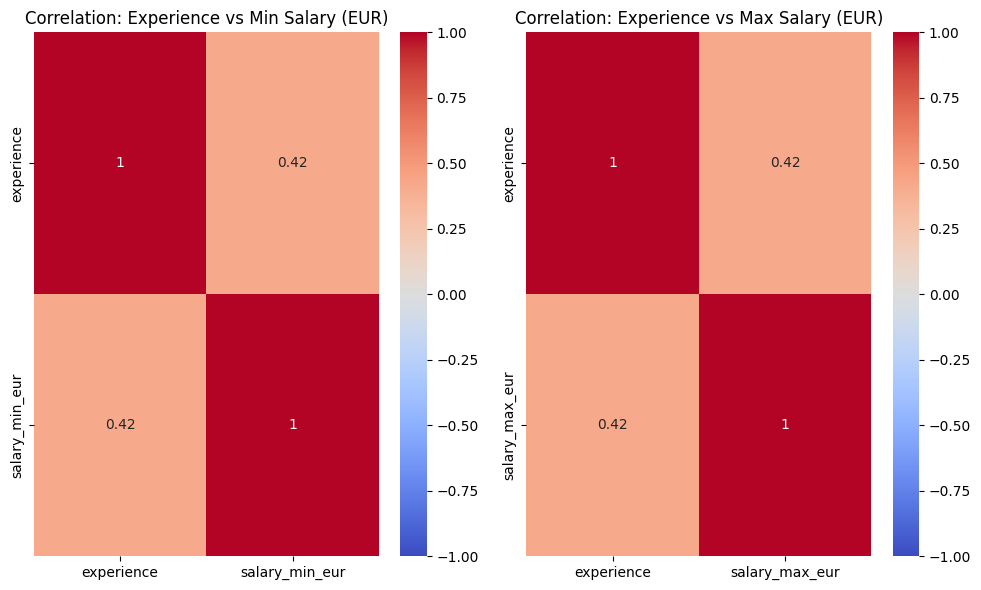

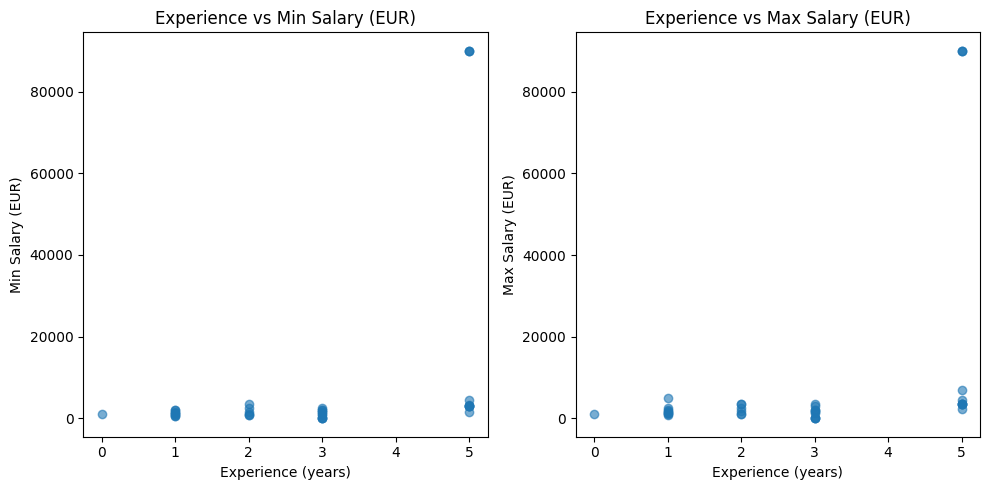

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where experience or salary (min or max) is missing
df_clean_corr = df.dropna(subset=['experience', 'salary_min_eur', 'salary_max_eur'])

# Compute correlation between experience and salaries
correlation_min = df_clean_corr[['experience', 'salary_min_eur']].corr()
correlation_max = df_clean_corr[['experience', 'salary_max_eur']].corr()

# Display correlation matrices
print("Correlation between Experience and Minimum Salary (EUR):")
print(correlation_min)
print("\nCorrelation between Experience and Maximum Salary (EUR):")
print(correlation_max)

# Plot heatmaps of the correlation matrices
plt.figure(figsize=(10, 6))

# Heatmap: Experience vs Min Salary
plt.subplot(1, 2, 1)
sns.heatmap(correlation_min, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Min Salary (EUR)")

# Heatmap: Experience vs Max Salary
plt.subplot(1, 2, 2)
sns.heatmap(correlation_max, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Max Salary (EUR)")

plt.tight_layout()
plt.show()

# Scatter plots for visual inspection
plt.figure(figsize=(10, 5))

# Scatter plot: Experience vs Min Salary
plt.subplot(1, 2, 1)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_min_eur'], alpha=0.6)
plt.title("Experience vs Min Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Min Salary (EUR)')

# Scatter plot: Experience vs Max Salary
plt.subplot(1, 2, 2)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_max_eur'], alpha=0.6)
plt.title("Experience vs Max Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Max Salary (EUR)')

plt.tight_layout()
plt.show()

## Salary and number of skills

Correlation Matrix (Average Salary vs Number of Skills):

                 salary_avg_eur  num_hard_skills  num_soft_skills
salary_avg_eur         1.000000         0.245218        -0.025262
num_hard_skills        0.245218         1.000000         0.586049
num_soft_skills       -0.025262         0.586049         1.000000


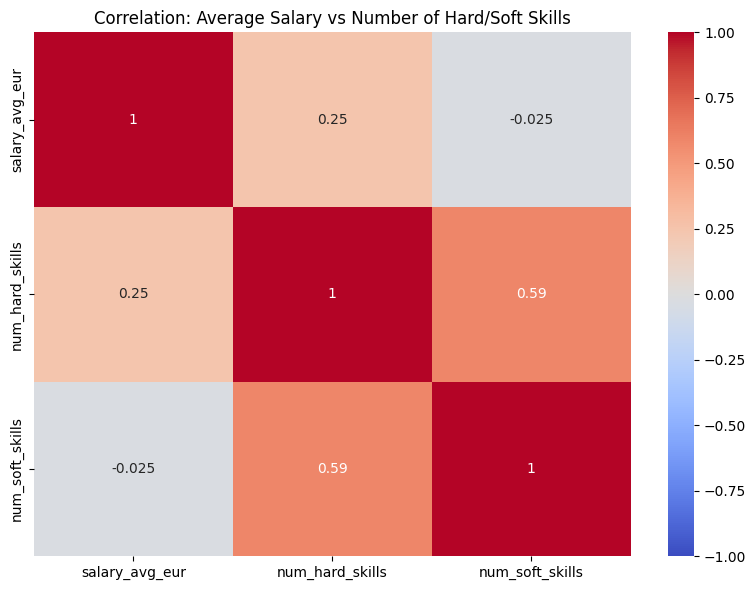

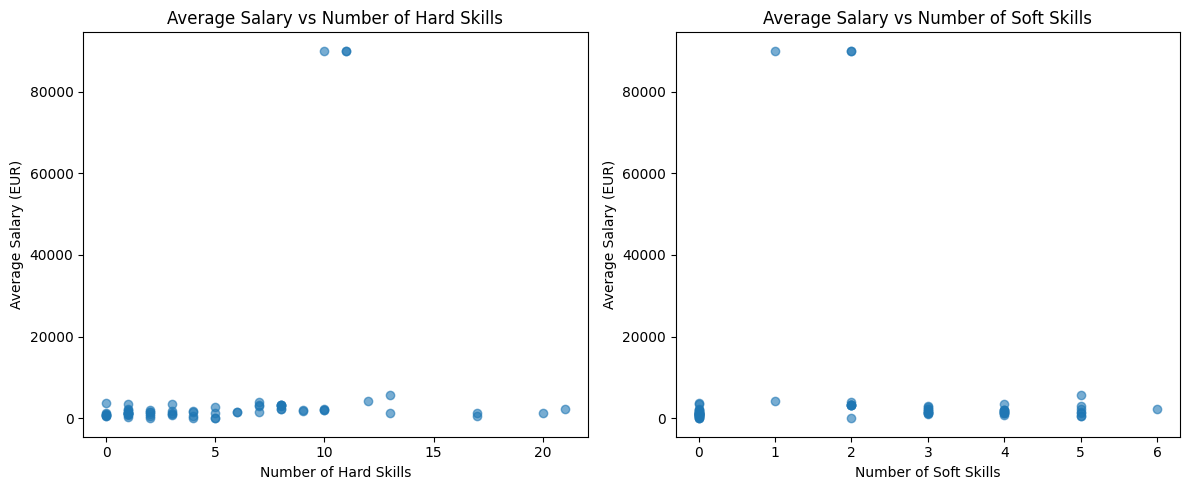

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded and has `salary_min_eur` and `salary_max_eur` from your previous code

# 1. Calculate average salary (mean of min and max salaries)
df['salary_avg_eur'] = df[['salary_min_eur', 'salary_max_eur']].mean(axis=1)

# 2. Count the number of hard and soft skills
df['num_hard_skills'] = df['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_soft_skills'] = df['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 3. Filter out rows where salary_avg_eur is NaN
df_clean_skills = df.dropna(subset=['salary_avg_eur'])

# 4. Calculate correlations between average salary and number of skills
correlation_skills = df_clean_skills[['salary_avg_eur', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Average Salary vs Number of Skills):\n")
print(correlation_skills)

# 5. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Average Salary vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# 6. Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Average Salary vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills['num_hard_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Hard Skills')
plt.xlabel('Number of Hard Skills')
plt.ylabel('Average Salary (EUR)')

# Scatter plot for Average Salary vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills['num_soft_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Soft Skills')
plt.xlabel('Number of Soft Skills')
plt.ylabel('Average Salary (EUR)')

plt.tight_layout()
plt.show()


## Expected experience and number of skills

Correlation Matrix (Experience vs Number of Skills):

                 experience  num_hard_skills  num_soft_skills
experience         1.000000         0.277562         0.268250
num_hard_skills    0.277562         1.000000         0.550843
num_soft_skills    0.268250         0.550843         1.000000


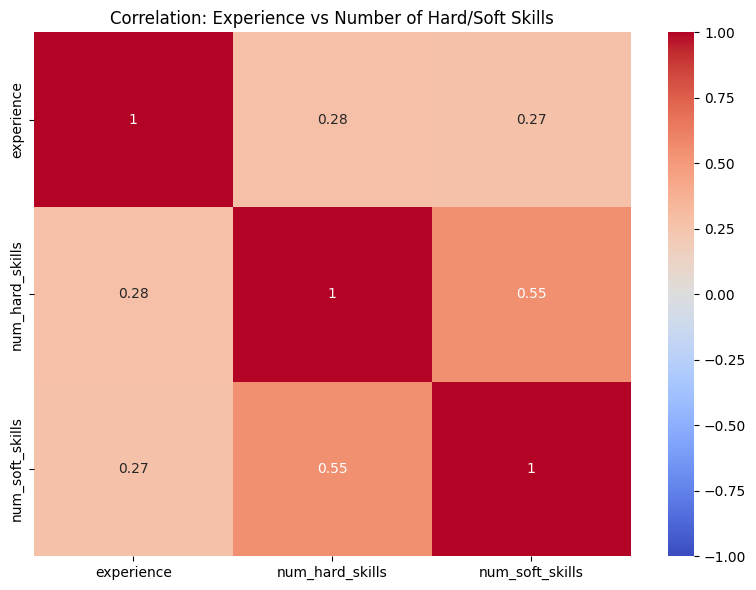

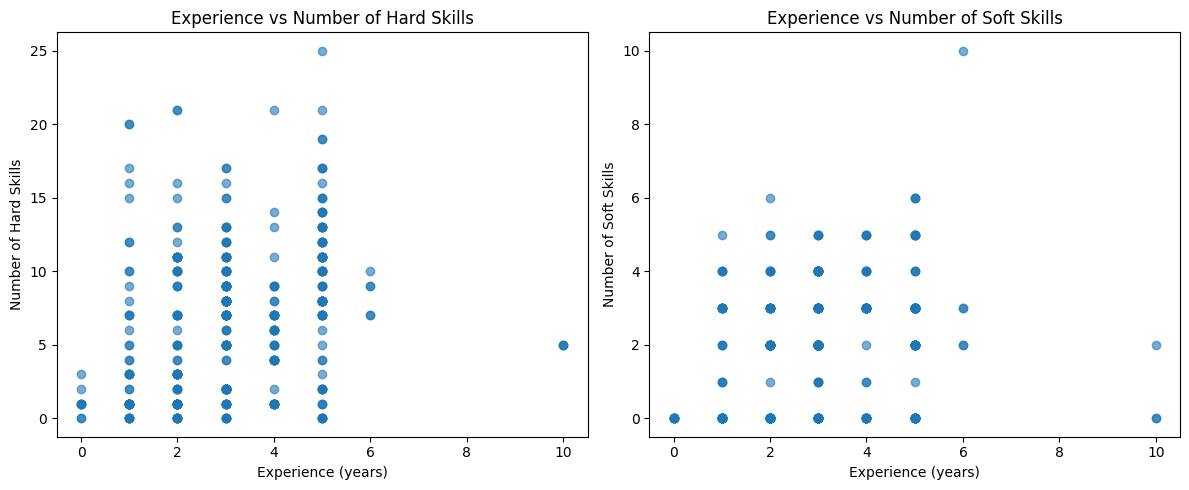

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded

# Clean rows with NaN in 'experience', 'hard_skills', or 'soft_skills' and create a copy
df_clean_skills_exp = df.dropna(subset=['experience', 'hard_skills', 'soft_skills']).copy()

# Count the number of hard and soft skills
df_clean_skills_exp['num_hard_skills'] = df_clean_skills_exp['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_clean_skills_exp['num_soft_skills'] = df_clean_skills_exp['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate correlations between experience and number of skills
correlation_exp_skills = df_clean_skills_exp[['experience', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Experience vs Number of Skills):\n")
print(correlation_exp_skills)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_exp_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Experience vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Experience vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_hard_skills'], alpha=0.6)
plt.title('Experience vs Number of Hard Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Hard Skills')

# Scatter plot for Experience vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_soft_skills'], alpha=0.6)
plt.title('Experience vs Number of Soft Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Soft Skills')

plt.tight_layout()
plt.show()


# Skill coocurences

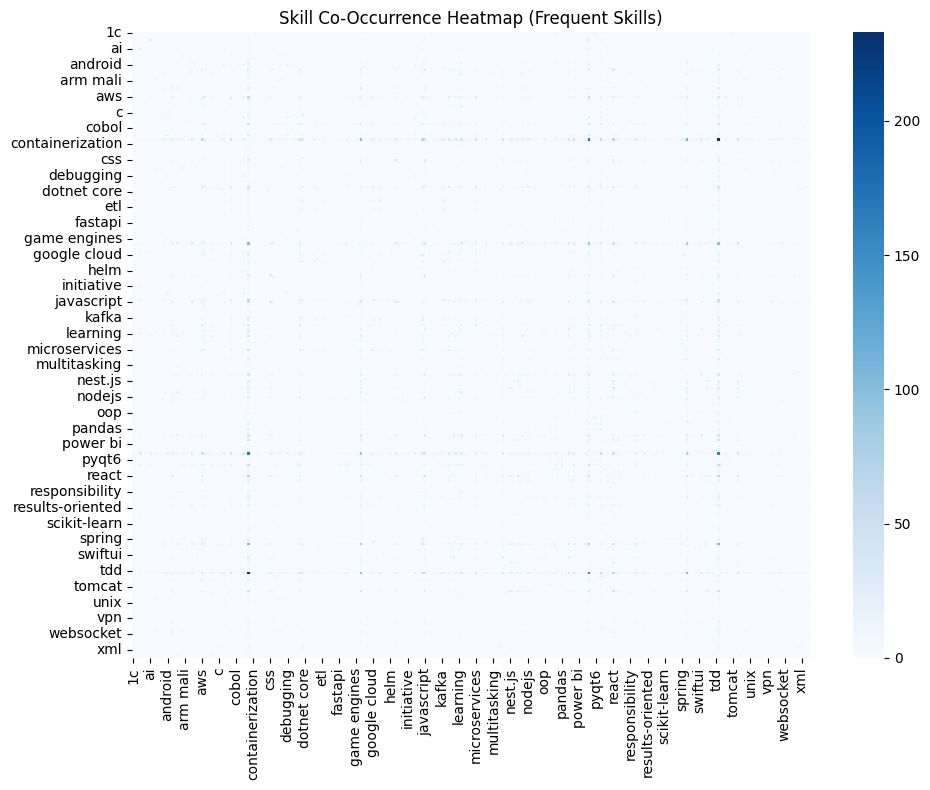

Top Skill Co-Occurrences:
communication & teamwork: 233 jobs
communication & problem solving: 168 jobs
problem solving & teamwork: 159 jobs
communication & sql: 110 jobs
sql & teamwork: 104 jobs
communication & git: 103 jobs
git & teamwork: 97 jobs
git & problem solving: 90 jobs
git & sql: 82 jobs
problem solving & sql: 76 jobs
communication & react: 71 jobs
communication & java: 70 jobs
aws & communication: 69 jobs
react & teamwork: 66 jobs
communication & python: 61 jobs
problem solving & python: 60 jobs
java & teamwork: 58 jobs
aws & problem solving: 57 jobs
communication & javascript: 55 jobs
python & teamwork: 53 jobs
problem solving & react: 51 jobs
communication & typescript: 50 jobs
git & react: 50 jobs
javascript & teamwork: 50 jobs
cicd & communication: 48 jobs
teamwork & typescript: 47 jobs
communication & docker: 47 jobs
react & typescript: 46 jobs
postgresql & teamwork: 45 jobs
git & typescript: 45 jobs
docker & teamwork: 45 jobs
communication & microservices: 45 jobs
comm

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Assuming df is already loaded
# Flatten all skills (hard + soft) into a single list per job
df['all_skills'] = df['hard_skills'] + df['soft_skills']

# Step 1: Collect unique skills incrementally and count frequencies
skill_counts = {}
for skills in df['all_skills']:
    for skill in skills:
        skill_counts[skill] = skill_counts.get(skill, 0) + 1

# Step 2: Filter skills appearing in at least 3 jobs
min_appearances = 3
frequent_skills = [skill for skill, count in skill_counts.items() if count >= min_appearances]
frequent_skills.sort()  # Sort for consistent ordering
skill_to_idx = {skill: idx for idx, skill in enumerate(frequent_skills)}

# Step 3: Create co-occurrence matrix using numpy
n_skills = len(frequent_skills)
co_occurrence_np = np.zeros((n_skills, n_skills), dtype=int)
for skills in df['all_skills']:
    # Only consider frequent skills
    job_skills = [skill for skill in skills if skill in skill_to_idx]
    skill_indices = [skill_to_idx[skill] for skill in job_skills]
    for i, j in combinations(skill_indices, 2):
        co_occurrence_np[i, j] += 1
        co_occurrence_np[j, i] += 1

# Convert to DataFrame for plotting
co_occurrence = pd.DataFrame(co_occurrence_np, index=frequent_skills, columns=frequent_skills)

# Step 4: Visualize as a heatmap
plt.figure(figsize=(10, 8))
annot = len(frequent_skills) <= 15
sns.heatmap(co_occurrence, cmap='Blues', annot=annot, fmt='d')
plt.title('Skill Co-Occurrence Heatmap (Frequent Skills)')
plt.tight_layout()
plt.show()

# Step 5: Alternative visualization - Bar chart of top co-occurrences
co_occurrence_stack = co_occurrence.where(np.triu(np.ones(co_occurrence.shape), k=1).astype(bool)).stack()
top_co_occurrences = co_occurrence_stack[co_occurrence_stack > 0].sort_values(ascending=False).head(50)

# Print top co-occurrences
print("Top Skill Co-Occurrences:")
for (skill1, skill2), count in top_co_occurrences.items():
    print(f"{skill1} & {skill2}: {int(count)} jobs")